In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Import personal functions
import sys
#sys.path.append("C:/Users/Olivi/OneDrive - TU Eindhoven/Soft robotic matter/GitHub/Thermal_Soft_Robotics/Functions")
sys.path.append("//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Functions")
import FluidicSetupFunctions
from save_plot_func import save_plot

# Set figure style
import scienceplots
plt.style.use(['science','nature','no-latex','vibrant'])



In [45]:
#Location = r"C:\Users\Olivi\OneDrive - TU Eindhoven\Soft robotic matter\data_analysis"
Location = r"//sun/overvelde/group-folder/PROJECTS/Thermal_soft_robotics_Olivier/Git/Thermal_Soft_Robotics/Thermal_actuation/Experimental/Fluidic/Pressure_flow_plastic_bottle"
Foldernames = ["/Data"]

data = FluidicSetupFunctions.LoadData(Foldernames = Foldernames,Location=Location)

print(data[0][-1].head)

Loading... Folder 1 of 1, Sample 1 of 8
Loading... Folder 1 of 1, Sample 2 of 8
Loading... Folder 1 of 1, Sample 3 of 8
Loading... Folder 1 of 1, Sample 4 of 8
Loading... Folder 1 of 1, Sample 5 of 8
Loading... Folder 1 of 1, Sample 6 of 8
Loading... Folder 1 of 1, Sample 7 of 8
Loading... Folder 1 of 1, Sample 8 of 8
<bound method NDFrame.head of        presFesto-0  AWM20-12  SSCDP05-3    Time
0         0.000387 -0.002912 -15.255849   0.001
1         0.000155 -0.001955 -14.905454   0.002
2        -0.000019 -0.001086 -14.891623   0.003
3        -0.000140 -0.000304 -15.169332   0.004
4        -0.000213  0.000392 -15.693559   0.005
...            ...       ...        ...     ...
19595     0.072877  0.066065   3.291364  19.596
19596     0.072835  0.066664   0.243335  19.597
19597     0.072798  0.067566  -4.106382  19.598
19598     0.072769  0.068807  -9.915566  19.599
19599     0.072749  0.070422 -17.341999  19.600

[19600 rows x 4 columns]>


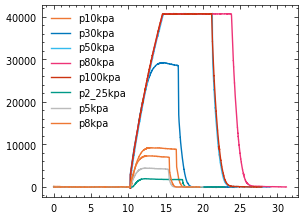

In [38]:
data[0][0]['SSCDP05-3']
for i in range(len(data[0])):
    

    plt.plot(data[0][i]['Time'],data[0][i]['SSCDP05-3'],label=data[1]['Samplename'][i])
    #plt.plot(data[0][i]['Time'],data[0][i]['SSCDP05-3'],label = data[1]['Samplename'][i])

plt.legend()

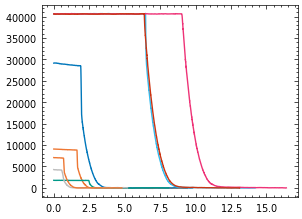

In [46]:
for i in range(len(data[0])):
    cutoff = 14.8
    sample_rate = data[1]['Samplerate'][i]
    
    # Find index to cutoff
    index_cutoff = int(cutoff * sample_rate)
    
    # Get new zero value for Time column
    new_zero = data[0][i].iloc[index_cutoff]['Time']
    
    # Subtract new_zero from all values in Time column
    data[0][i]['Time'] = data[0][i]['Time'] - new_zero
    
    # Keep rows after cutoff
    data[0][i] = data[0][i].iloc[index_cutoff:]
    
    # Reset index
    data[0][i].reset_index(drop=True, inplace=True)

    plt.plot(data[0][i]['Time'],data[0][i]['SSCDP05-3'],label=data[1]['Samplename'][i])

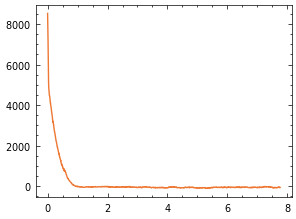

In [10]:
treshold=70
difference=np.diff(data[0][0]['SSCDP05-3'])

indices = np.where(difference < -treshold)

sharp_decrease= data[0][0]['SSCDP05-3'][indices[0]]
plt.plot(data[0][0]['Time'][:-indices[0][0]],data[0][0]['SSCDP05-3'][indices[0][0]:])

2169
2204
6983
9119
6375
2584
930
1166


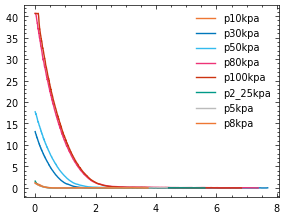

In [51]:
data[0][0]['SSCDP05-3']
for i in range(len(data[0])):
    treshold=100
    difference=np.diff(data[0][i]['SSCDP05-3'])
    indices = np.argmax(difference)
    print(indices)

    plt.plot(data[0][i]['Time'][:-(indices-100)],data[0][i]['SSCDP05-3'][(indices-100):]/1000,label=data[1]['Samplename'][i])
    #plt.plot(data[0][i]['Time'],data[0][i]['SSCDP05-3'],label = data[1]['Samplename'][i])

plt.legend()

In [41]:
np.max(difference)

12.17725972540029